<h1 align = 'center'> Desmistificando as Redes Neurais Artificiais </h1>
<h2 align = 'center'> Parte 1: Dados e Arquitetura </h2>


<h4 align = 'center' >traduzido de  @stephencwelch </h4>

<h3 align = 'center'> Variáveis </h3>

|Simbolo Código | Símbolo Matemático | Definição | Dimensões
| :-: | :-: | :-: | :-: |
|X|$$X$$|Dados de entrada,cada linha é um exemplo| (numeroExamplos, tamanhoCamadaEntrada)|
|y |$$y$$|Saídas |(numeroExamplos, tamanhoCamadaSaida)|

Digamos que você deseja prever um valor y dado um valor de entrada x. Por exemplo, talvez você deseje saber que nota você tiraria em uma prova baseado nas horas que você dormiu e estudou na noite anterior. Para usar uma abordagem de aprendizagem de máquina, primeiros nós precisaremos de alguns dados. Digamos que nos últimos três exames você tenha registrado seu número de horas estudando, seu número de horas dormindo e o seu resultado na prova. Utilizaremos a linguagem de programação Python para armazenar nossos dados em uma matriz bidimensional da biblioteca numpy.

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import numpy as np

# X = (horas dormindo, horas estudando), y = nota obtida
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([7.5], [8.2], [9.3]), dtype=float)

In [15]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [16]:
y

array([[ 7.5],
       [ 8.2],
       [ 9.3]])

Agora que temos alguns dados, nós os utilizaremos para construir um modelo para prever como você se sairá no próximo teste com base em quantas horas você dormiu e estudou. Isto é chamado um problema de regressão supervisionado. É supervisionado porque nossos exemplos possuem entradas e saídas. É um problema de regressão porque nós estamos prevendo sua nota a qual se trata de uma saída contínua. Se estivéssemos calculando a sua situação final (Aprovado ou Reprovado), estaríamos trabalhando com um problema de classificação e não de regressão.
Há um número esmagador de modelos em aprendizagem de máquina. Aqui usaremos um particularmente interessante que é chamado de redes neurais artificiais. Estes modelos são baseados levemente em como os neurônios do seu cérebro funcionam. Elas têm obtidos grandes sucessos resolvendo grandes e difícil problemas.
Antes de jogarmos nossos dados em um modelo, necessitamos observar as diferenças de unidades em nossos dados. Ambas as entradas são em horas e as saídas são em notas de uma prova cuja escala vai de 0 a 10. As redes neurais são inteligentes, mas não inteligentes o suficiente para adivinhar as unidades dos dados. Seria como comparar maçãs com laranjas enquanto a maioria dos modelos de aprendizagem desejam comparar maçãs com maçãs. A solução é mudar a escala dos nossos dados de forma que o nosso modelo somente veja unidades padronizadas. Aqui usaremos a vantagem do fato de que todos os nossos dados são positivos e simplesmente dividi-los pelo valor máximo de cada variável de forma que estes permaneçam entre zero e um.


In [17]:
# Normalizar
X = X/np.amax(X, axis=0) # Como não sabemos o maior valor possível do dataset pegamos o máximo da tabela
y = y/10 #Nota máxima é 10

In [18]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [19]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Agora podemos construir nossa rede neural. Nós sabemos que a mesma deve ter duas entradas e uma saída por causa das dimensões de nossos dados. Chamaremos nossa saída de yHat (y-chapéu) por se tratar de uma estimativa de y, mas não o mesmo valor que y. Qualquer camada entre nossa entrada e nossa saída é chamada de camada oculta. Recentemente, pesquisadores construíram redes neurais com inúmeras camadas ocultas. Estas são chamadas de redes de crenças profundas dando origem ao termo aprendizagem profunda (deep learning). Aqui utilizaremos uma camada oculta com 3 unidades, mas se quiséssemos construir uma rede neural profunda simplesmente empilharíamos um amontoado de camadas.

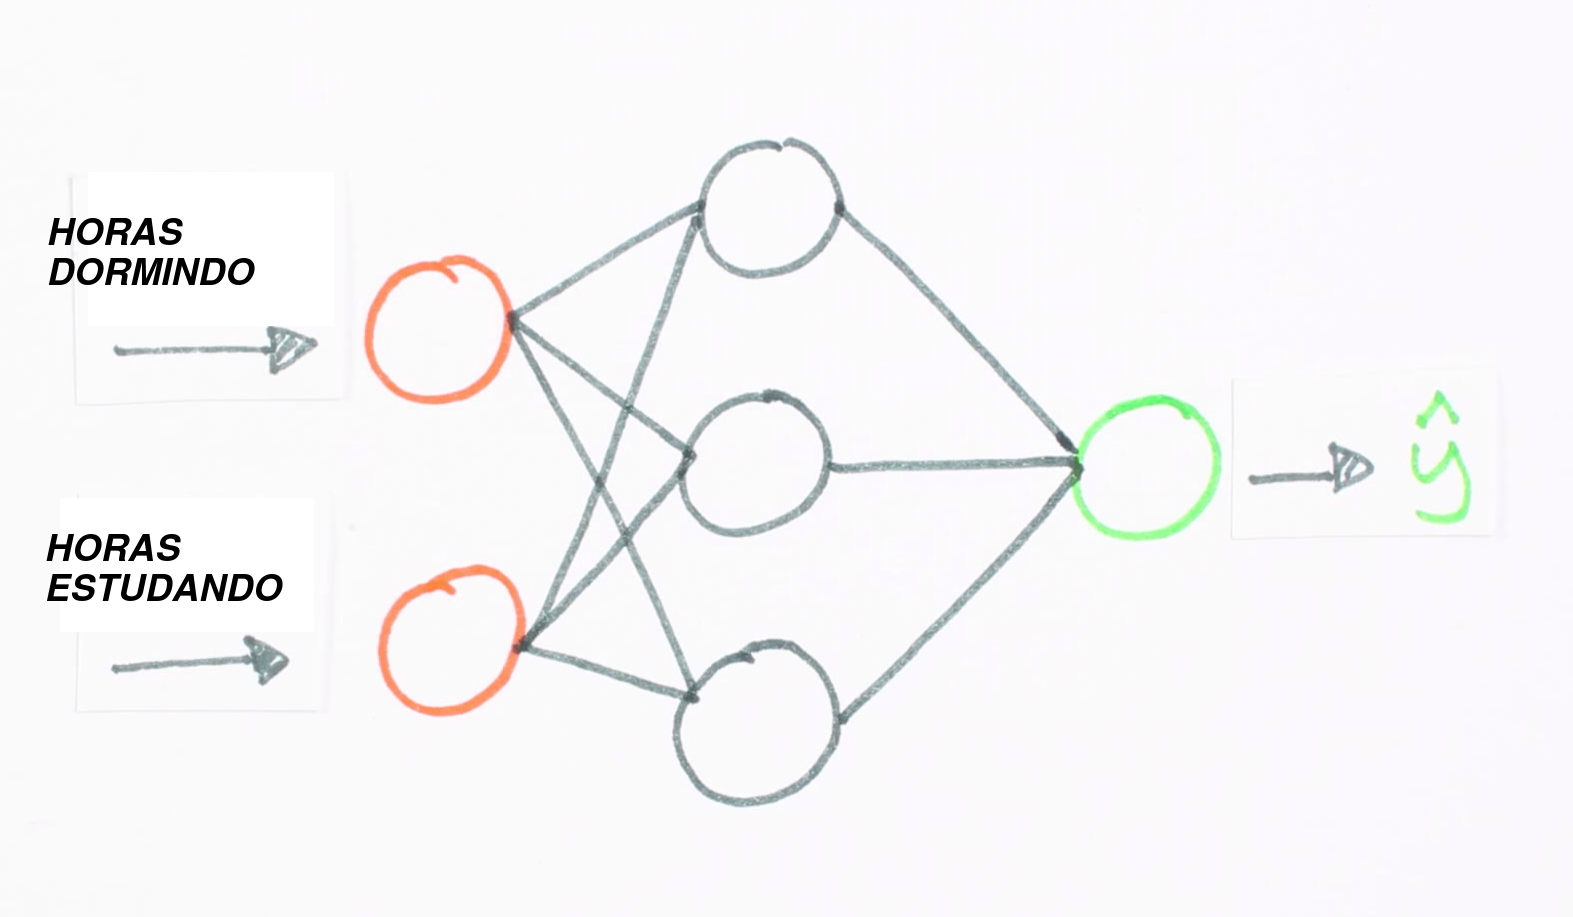

In [20]:
from IPython.display import Image
i = Image(filename='../images/Part1DataandArchitecture_15_0-modificado.png')
i

Em redes neurais, círculos representam neurônios e linhas representam as sinapses. Sinapses tem uma função simples, elas recebem um valor de entrada, multiplicam por um determinado peso e enviam o resultado para a saída. Neurônios são um pouco mais complicados. Sua função é fazer o somatório de todas as suas sinapses e aplicar uma função de ativação. Algumas funções de ativação permitem as redes neurais de modelarem padrões não lineares mais complexos em que modelos mais simples tendem a falhar. Para o nosso exemplo de utilizaremos funções de ativação do tipo sigmoide. A seguir construímos a nossa função em Python.

<h1 align = 'center'> Redes Neurais Desmistificadas </h1>
<h2 align = 'center'> Parte 2: Encadeamento Pra Frente </h2>


<h4 align = 'center' > Traduzido de @stephencwelch </h4>

<h3 align = 'center'> Variables </h3>

|Símbolo no Código| Símbolo Matemático | Definição | Dimensões
| :-: | :-: | :-: | :-: |
|X|$$X$$|Dados de entrada, cada linha em um exemplo| (numeroExemplos, tamanhoCamadaEntrada)|
|y |$$y$$|Saídas |(numeroExamplos, tamanhoCamadaSaída)|
|W1 | $$W^{(1)}$$ | Pesos Camada 1 | (tamanhoCamadaEntrada, tamanhoCamadaOculta) |
|W2 | $$W^{(2)}$$ | Pesos Camada 2 | (tamanhoCamadaOculta, tamanhoCamadaSaida) |
|z2 | $$z^{(2)}$$ | Ativação Camada 2  | (numeroExemplos, tamanhoCamadaOculta) |
|a2 | $$a^{(2)}$$ | Actividade Camada 2 | (numeroExemplos, tamanhoCamadaOculta) |
|z3 | $$z^{(3)}$$ | Ativação Camada 3 | (numeroExemplos, tamanhoCamadaSaida) |

Nós já definimos a rede neural no papel. Agora vamos implementá-la em linguagem python. Construímos a rede como uma classe Python onde o método init (Construtor da classe) se encarregará de instanciar constantes e variáveis importantes. Nós tornaremos esses valores acessíveis para toda a classe colocando a palavra “self.” antes do nove da variável.
Nossa rede tem 2 entradas, 3 unidades ocultas e uma saída. Estes são exemplos de hiperparâmetros.  Hiperparâmetros são constantes que estabelecem a estrutura e comportamento da rede neural, mas não são atualizáveis à medida que treinamos a rede. Nosso algoritmo de aprendizagem não é capaz de, por exemplo, decidir se é necessária uma nova camada oculta. Isto é algo que temos que decidir antes do treinamento. O Que a rede neural aprende são parâmetros, mais especificamente, os pesos das sinapses.
A movimentação dos dados através da rede será feita através do método chamado “forward”. Ao invés de passar os dados um de cada vez, nós usaremos matrizes para passarmos múltiplos dados de uma só vez. Fazendo isso ganhamos velocidade de processamento especialmente quando usamos ferramentas como p matlab ou o numpy. Nossa matriz de entrada de dados, X, tem dimensão 3 x 2 porque temos exemplos de dimensão 3 x 2. Nossa matriz de saída correspondente é de dimensão 3 x 1.


In [21]:
print(X.shape, y.shape) # Dimensões de X e y

(3, 2) (3, 1)


In [22]:
#iniciando a nossa classe
class Neural_Network(object):
    def __init__(self):        
        #Definir os hiperparâmentros
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
    def forward(self, X):
        #Propagar as entradas através da rede.
        pass

Cada valor de entrada, ou elemento na matriz X, necessita ser multiplicado pelo peso correspondente e então adicionado aos resultados dos outros neurônios. Trata-se de uma operação complexa, mas se tomarmos as três saídas, estaremos olhando para uma linha (coluna) de uma matriz e, colocando todos os pesos individuais em uma matriz de pesos, podemos criar o exato comportamento que precisamos multiplicando a matriz de entrada pela matriz de pesos. O uso de multiplicação de matrizes nos permite passar as múltiplas entradas de uma vez simplesmente adicionando linhas à matriz X. A partir de agora chamamos estas matrizes de X, W um, e z dois onde z dois refere-se a atividade no segundo nível. Observe que cada entrada em z é a soma ponderada das entradas em cada neurônio oculto. Z tem tamanho 3 x 3, uma linha para cada exemplo e uma coluna para cada unidade oculta.

Temos agora a nossa primeira formula,  $z^{(2)} = XW^{(1)}$. A notação matricial é interessante aqui por nos permitir expressar a complexidade intrínseca em apenas uma linha. 

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$

In [23]:
#Criando uma matriz de números aleatórios em python
w1 = np.random.randn(2, 3) # retorna uma amostra na forma de matriz 2 x 3 baseada na distribuição normal 
                           # standart media = 0 variância = 1
w1



array([[-0.53712765,  0.23008248, -0.84234415],
       [-0.72873207,  1.03540602, -1.12925204]])

In [24]:
#multiplicando matrizes
np.dot(X,w1)

array([[-0.88987036,  1.10443077, -1.38195529],
       [-0.41431024,  0.32212244, -0.64702248],
       [-0.82862047,  0.64424489, -1.29404497]])

Agora que temos as atividades para nosso segundo nível, z dois, necessitamos precisamos aplicar nossa função de ativação. Aplicamos a função em cada entrada da matriz z usando o método python chamado sigmoide pelo fato de estarmos usando uma sigmoide como função de ativação. O numpy é realmente interessante aqui porque podemos passar um escalar, vetor ou matriz e o numpy aplicará a função de ativação a cada elemento e retornará como resultado o elemento na mesma dimensão que foi dada.

In [25]:
#definindo a função sigmóide
def sigmoid(z):
        # aplicando a funçao sigmóide. Pode ser aplicada a elementos, vetores ou matrizes
        return 1 / (1 + np.exp(-z))


In [26]:
#aplicando a função 
sigmoid(1)

0.7310585786300049

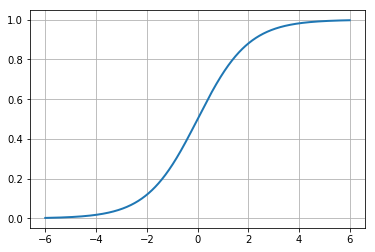

In [27]:
from matplotlib import pylab
#plotando
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

Agora temos nossa segunda fórmula para nosso “forward”. Usando f para denotar nossa função de ativação, podemos escrever que a atividade no segundo nível é igual a f de z dois. a dois será uma matriz com o mesmo tamanho de z dois ou seja 3x3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

Para finalizar o encadeamento pra frente (forward propagation), precisamos propagar (aˆ2) até a saída, yhat. Já fizemos o trabalho pesado na camada anterior, então tudo o que temos a fazer agora é multiplicar (a^2) por nossos pesos da camada 2 (W2) e aplicar mais uma função de ativação. (W2) será de tamanho 3x1, um peso para cada sinapse. Multiplicando (a2), uma matriz  3 por 3, por (W2), uma matriz 3 por 1, resulta em uma matriz 3 por 1 (Z^3) três, a ativação da nossa terceira camada. z3 tem três valores de ativação, um para cada exemplo. Por último, mas não menos importante, vamos aplicar a nossa função de ativação a (z^3), produzindo a nossa estimativa oficial da sua pontuação no teste, yHat.


$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

Precisamos implementar nossas fórmulas de encadeamento pra frente em python. Primeiro vamos inicializar nossas matrizes de peso em nosso método init. Para valores iniciais, usaremos números aleatórios.


Vamos implementar a propagação progressiva em nosso método forward, usando o método (dot) embutido do numpy para multiplicação de matrizes e nosso próprio método sigmóide.

In [28]:
# Finalmente colocando tudo em uma classe.
class Neural_Network(object):
    def __init__(self):
        # Parametros da rede
        self.inputLayerSize = 2  #Tamanho da camada de entrada
        self.outputLayerSize = 1 #Tamanho da camada de saída
        self.hiddenLayerSize = 3 #Tamanho da camada oculta

        #Pesos
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        # Propagando as entradas para frente
        self.z2 = np.dot(X, self.W1)
        # Saídas da camada 2
        self.a2 = self.sigmoid(self.z2)
        # Propagando para a frente
        self.z3 = np.dot(self.a2, self.W2)
        #Calculando a saída final
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        # aplicando a funçao sigmóide. Pode ser aplicada a elementos, vetores ou matrizes
        return 1 / (1 + np.exp(-z))


E então temos uma classe python capaz de estimar sua pontuação na prova, dadas quantas horas você dorme e quantas horas você estuda. Podemos transmitir nossos dados de entrada e obter resultados reais. Agora, você pode estar percebendo que nossas estimativas são terríveis. Isso é porque nós ainda não treinamos nossa rede e  é com isso que vamos trabalhar na sequência.

<h1 align = 'center'> Redes Neurais Desmistificadas </h1>
<h2 align = 'center'> Parte 3: Gradiente Descendente </h2>


<h4 align = 'center' > Traduzido de @stephencwelch </h4>

<h3 align = 'center'> Variáveis </h3>

|Símbolo no Código | Símbolo Matemático | Definição | Dimensões
| :-: | :-: | :-: | :-: |
|X|$$X$$|Dados de entrada, cada linha é um exemplo | (numeroExamplos, tamanhoCamadaEntrada)|
|y |$$y$$|Saídas|(numeroExamplos, tamanhoCamadaSaida)|
|W1 | $$W^{(1)}$$ | Pesos da camada 1 | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Pesos da camada 2 | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Ativação da camada 2 | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Ativação da Camada 2 | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Ativação da camada 3 | (numExamples, outputLayerSize) |

A última vez que construímos uma rede neural em python(acima), ela fez previsões muito ruins de sua pontuação em um teste baseado em quantas horas você dormiu e quantas horas você estudou na noite anterior. Desta vez, vamos nos concentrar na teoria de como tornar essas previsões melhores.


Podemos inicializar a rede que construímos da última vez e passar nossos dados normalizados, X, usando nosso método forward, e dar uma olhada em nossa estimativa de y, yHat.

In [29]:
nn = Neural_Network()

In [30]:
yHat = nn.forward(X)

In [31]:
yHat

array([[ 0.55110273],
       [ 0.58431948],
       [ 0.57042468]])

In [32]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

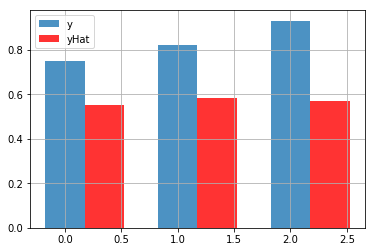

In [33]:
#Comparando os valores calculados com os esperados.
#
bar([0,1,2], y.reshape(3), width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat.reshape(3), width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])

Neste momento, nossas previsões são bem imprecisas. Para melhorar nosso modelo, primeiro precisamos quantificar exatamente o quão erradas são nossas previsões. Nós vamos fazer isso com uma função de custo. Uma função de custo nos permite expressar exatamente o quão errado ou "caro" nossos modelos são, dados nossos exemplos.

Uma maneira de calcular um custo geral é pegar cada valor de erro, elevá-lo ao quadrado e  somar os valores obtidos. Dividir pela metade tornará as coisas mais simples no futuro. Agora que temos um custo, nosso trabalho é minimizá-lo. Quando alguém diz que está treinando uma rede, o que realmente querem dizer é que estão minimizando uma função de custo.


$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

O custo é uma função de duas coisas, nossos exemplos e os pesos nas sinapses. Não temos muito controle sobre nossos dados, portanto minimizaremos nossos custos alterando os pesos.


Conceitualmente é bem simples. Temos uma coleção de 9 pesos individuais, e estamos dizendo que há uma combinação de w que fará com que nosso custo, J, seja o menor possível. Quando vi pela primeira vez esse problema no aprendizado de máquina, pensei, vou experimentar TODOS OS PESOS ATÉ QUE ENCONTRE O MELHOR! Afinal eu tenho um computador!

Entramos na maldição da dimensionalidade. Aqui está o problema. Vamos fingir por um segundo que temos apenas 1 peso, em vez de 9. Para encontrar o valor ideal do nosso peso que irá minimizar nosso custo, precisamos testar vários valores para W, digamos que testamos 1000 valores. Isso não parece tão ruim, afinal, o computador é bem rápido.


In [34]:
#Fazendo uma pequena brincadeira com os pesos
# Supondo que ajsutamos apenas 1 dos pesos ao invés dos nove.
#
pesosTentar = np.linspace(-5,5,1000)

In [35]:
pesosTentar

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

In [36]:
custos = np.zeros(1000)

In [37]:
custos

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [38]:
import time
inicio = time.clock()
for i in range(1000):
    nn.W1[0,0] = pesosTentar[i]
    yHat = nn.forward(X)
    custos[i] = 0.5*sum((y-yHat)**2) # Aqui calcala-se a soma dos erros quadráticos
    
fim = time.clock()

In [39]:
duracao = inicio-fim

In [40]:
duracao

-0.054374000000000144

Demora cerca de 0,07 segundos para verificar 1000 valores de peso diferentes para a nossa rede neural. Como calculamos o custo de uma ampla faixa de valores de W, podemos escolher o que tiver o menor custo, deixemos que esse seja o nosso peso com que treinamos nossa rede.


Text(0.5,0,'Pesos')

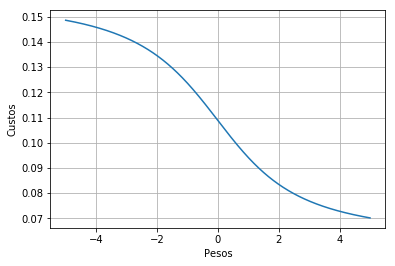

In [41]:
plot(pesosTentar,custos)
grid(1)
ylabel('Custos')
xlabel('Pesos')

Então você pode estar pensando que 0,07 segundos para treinar uma rede não é tão ruim, e nós ainda não otimizamos nada ainda. Além disso, existem outras linguagens mais rápidas que o python.

Antes de otimizarmos, vamos considerar a complexidade total do problema. Lembre-se que os 0,07 segundos necessários são apenas para um peso e temos 9 no total! Vamos considerar em seguida 2 pesos. Para manter a mesma precisão, precisamos agora verificar 1000 vezes 1000 ou um milhão de valores. Isso é muito trabalho, mesmo para um computador rápido.

In [42]:
# considerando dois pesos
pesosTentar = np.linspace(-5,5,1000)
custos = np.zeros((1000, 1000))

inicio = time.clock()
for i in range(1000):
    for j in range(1000):
        nn.W1[0,0] = pesosTentar[i]
        nn.W1[0,1] = pesosTentar[j]
        yHat = nn.forward(X)
        custos[i, j] = 0.5*sum((y-yHat)**2)
    
fim = time.clock()
duracao = fim - inicio
duracao

52.127418999999996

Depois das nossas 1 milhão de avaliações, encontramos a nossa solução, mas demorou 62 segundos angustiantes! A verdadeira maldição da dimensionalidade entra em cena à medida que continuamos a adicionar dimensões. Pesquisando através de três pesos levaria um bilhão de avaliações, ou 11 horas! Pesquisando através de todos os 9 pesos que precisamos para a nossa rede simples levaria 1.268.391.679.350.583,5 anos. (Mais de um quardrilhão de anos). Então, por essa razão, o método de otimização "apenas tentar tudo" ou de força bruta claramente não funcionará.

In [43]:
# 62 segundos para dois pesos mas são nove.
# uma boa estimativa para os nove pesos seria (em anos)
0.07*(1000**(9-1))/(3600*24*365)

2219685438863521.2

In [44]:
# Resultado: Não dá pra tentar de um por um (Força Bruta)
#

Vamos voltar ao caso unidimensional e ver se podemos ser mais inteligentes. Vamos avaliar nossa função de custo para um valor específico de w. Se w for 1.1, por exemplo, podemos executar nossa função de custo e ver que J é 2.8. Agora ainda não aprendemos muito, mas vamos tentar adicionar um pouco de informação ao que já sabemos. E se pudéssemos descobrir qual caminho era para baixo? Se pudéssemos, saberíamos se fazer W menor ou maior diminuir o custo. Poderíamos testar a função de custo imediatamente à esquerda e à direita do nosso ponto de teste e ver qual é menor. Isso é chamado de estimativa numérica e, às vezes, é uma boa abordagem, mas, para nós, existe uma maneira mais rápida. Vamos olhar para as nossas equações até agora


$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$
$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$


Temos 5 equações, mas podemos realmente pensar nelas como uma grande equação.

E como temos uma grande equação que determina exclusivamente nosso custo, J, de X, y, W1 e W2, podemos usar nosso bom cálculo para encontrar o que procuramos. Queremos saber "qual caminho é a descida", ou seja, qual é a taxa de variação de J em relação a W, também conhecida como derivada. E nesse caso, já que estamos considerando apenas um peso por vez, a derivada parcial.

Podemos derivar uma expressão para dJdW, que nos dará a taxa de variação de J em relação a W, para qualquer valor de W! Se dJdW for positivo, a função de custo está subindo. Se dJdW é negativo, a função de custo está descendo.

Agora podemos realmente acelerar as coisas. Como sabemos em que direção o custo diminui, podemos economizar todo o tempo que gastamos procurando na direção errada. Podemos economizar ainda mais tempo computacional, iterativamente dando passos para baixo e parando quando o custo deixa de ficar menor.

Esse método é conhecido como gradiente descendente e, embora possa não parecer tão impressionante em uma dimensão, é capaz de acelerar incríveis em dimensões mais altas. De fato, em nosso vídeo final, mostraremos que o que teria levado 10 ^ 27 avaliações de função com nosso método de força bruta levará menos de 100 avaliações com gradiente descendente. A descida de gradiente nos permite encontrar agulhas em palheiros.

Agora, antes de celebrarmos demais, há uma restrição. E se a nossa função de custo nem sempre seguir na mesma direção? E se subir e depois descer? O nome matemático para isso é não-convexo, e pode realmente acabar com o nosso algoritmo de gradiente descendente, colocando-o preso em um mínimo local em vez de nossos mínimos globais ideais. Uma das razões pelas quais escolhemos nossa função de custo para ser a soma dos erros quadrados foi explorar a natureza convexa das equações quadráticas.

Sabemos que o gráfico de y é igual a x ao quadrado é uma boa parábola convexa e acontece que versões dimensionais superiores também são!

Outra peça do quebra-cabeça aqui é que dependendo de como usamos nossos dados, pode não importar se a função custo é convexa ou não. Se usarmos nossos exemplos um de cada vez, em vez de todos de uma vez, às vezes não importa se nossa função de custo é convexa, ainda encontraremos uma boa solução. Isso é chamado de descida gradiente estocástica. Então, talvez não devamos ter medo de funções de custo não convexas, como diz o mago das redes neurais Yann Lecun em sua excelente palestra "Quem tem medo de funtions de perda não convexa?"


Link da palestra do  Yann : http://videolectures.net/eml07_lecun_wia/

Os detalhes de descida de gradiente são um tópico profundo para outro dia, pois agora vamos fazer nosso estilo gradiente de descida "batch", onde usamos todo o nosso exemplo de uma só vez, e a forma como configuramos nossa função de custo deixaram as coisas agradáveis ​​ e convexas. Em seguida vamos calcular e codificar nossos gradientes!

<h1 align = 'center'> Neural Networks Demystified </h1>
<h2 align = 'center'> Parte 4: Backpropagation </h2>


<h4 align = 'center' >  Traduzido de @stephencwelch </h4>

<h3 align = 'center'> Variáveis </h3>

|Síbolo no Código | Síbolo MatemáticoMath | Definição | Dimensões
| :-: | :-: | :-: | :-: |
|X|$$X$$|Dados de Entrada, cada linha é um exemplo | (numExamples, inputLayerSize)|
|y |$$y$$|Dados de Saída|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Pesos da Camada 1 | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Pesos na camada 2 | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Ativação na Camada 2 | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Atividade na Camada 2 | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Ativação na Camada 3 | (numExamples, outputLayerSize) |
|J | $$J$$ | Cost | (1, outputLayerSize) |
|dJdz3 | $$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$ | Derivada Parcial do custo em relação a $z^{(3)}$ | (numExamples,outputLayerSize)|
|dJdW2|$$\frac{\partial J}{\partial W^{(2)}}$$|Derivada parcial do custo em relação a $W^{(2)}$|(hiddenLayerSize, outputLayerSize)|
|dz3dz2|$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$| Derivada parcial de $z^{(3)}$ com relação a $z^{(2)}$|(numExamples, hiddenLayerSize)|
|dJdW1|$$\frac{\partial J}{\partial W^{(1)}}$$|Derivada parcial do custo com relação a $W^{(1)}$|(inputLayerSize, hiddenLayerSize)|
|delta2|$$\delta^{(2)}$$|Backpropagating Error 2|(numExamples,hiddenLayerSize)|
|delta3|$$\delta^{(3)}$$|Backpropagating Error 1|(numExamples,outputLayerSize)|

Até aqui, decidimos usar gradiente descendente para treinar nossa Rede Neural para que ela pudesse fazer previsões melhores do seu resultado em um teste baseado em quantas horas você dormiu e quantas horas você estudou na noite anterior. Para realizar gradiente descendente, precisamos de uma equação e algum código para nosso gradiente, dJ / dW.


Nossos pesos, W, estão divididos em duas matrizes, W1 e W2. Separaremos nosso cálculo de dJ / dW da mesma maneira calculando dJdW1 e dJdW2 independentemente. Devemos ter tantos valores de gradiente quanto valores de peso, então, quando terminarmos, nossas matrizes dJdW1 e dJdW2 terão o mesmo tamanho de W1 e W2.


$$
\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

Vamos trabalhar primeiro no dJdW2. O somatório, em nossa função de custo, adiciona o erro de cada exemplo para criar nosso custo total. Aproveitaremos a regra da soma de derivadas, que diz que a derivada das somas é igual à soma das derivadas. Podemos mover nosso sigma para fora e apenas nos preocupar com a derivada da expressão interna primeiro.


$$
\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

Para simplificar, esqueceremos temporariamente o somatório. Depois que tivermos calculado o dJdW para um único exemplo, adicionaremos todos os nossos termos derivados individuais.


Podemos agora analisar nossa derivada. A regra da potência nos diz para baixar nosso expoente (2) e multiplicar. Para finalizar, precisamos aplicar a regra da cadeia.

A regra da cadeia nos diz como pegar a derivada de uma função dentro de outra função. Pegamos a derivada da função externa e então a multiplicamos pela derivada da função interna.

Uma maneira de expressar a regra da cadeia é como um produto dos derivadas, isso será muito útil à medida que avançamos na retropropagação. Na verdade, um nome melhor para a retropropagação pode ser: não pare de fazer a regra da cadeia. Nunca.

Nós pegamos a derivada da parte externa da nossa função de custo - agora precisamos multiplicá-la pela derivada do lado de dentro.

Y é apenas a pontuação dos nossos testes, que não muda, então a derivada de y, uma constante, com relação a W dois, é 0! yHat, por outro lado, muda em relação a W dois, portanto, aplicamos a regra da cadeia e multiplicamos nossos resultados por menos dYhat / dW2.


$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}
$$

Agora precisamos pensar sobre a derivada de yHat em relação a W2. A equação 4 nos diz que yHat é nossa função de ativação de z3, portanto, será útil aplicar novamente a regra de cadeia para dividir dyHat / dW2 em dyHat / dz3 vezes dz3 / dW2.


$$
\frac{\partial J}{\partial W^{(2)}} = 
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}  
\frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

Para encontrar a taxa de variação de yHat em relação a z3, precisamos diferenciar nossa função de ativação (sigmóide) em relação a z.
 

$$
f(z) = \frac{1}{1+e^{-z}}
$$

$$
f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}
$$

Agora é um bom momento para adicionar um novo método python para a derivada da nossa função sigmóide, sigmóide 'linha'. Nossa derivada deve ser a maior onde nossa função sigmóide é a mais íngreme, no valor z iguala a zero.

In [46]:
# Agora vamos ver a derivada da função sigmoide linha (prime)
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)


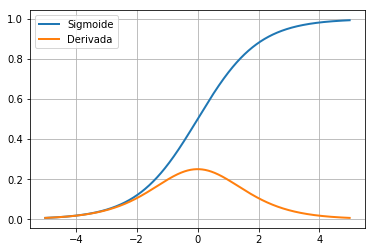

In [47]:
# comparando as duas
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['Sigmoide', 'Derivada'])

Podemos agora substituir dyHat/dz3 por f prime de z3.

$$
\frac{\partial J}{\partial W^{(2)}}= 
-(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

Nossa peça final do quebra-cabeça é dz3dW2, este termo representa a variação de z, nossa atividade de terceira camada, com relação aos pesos na segunda camada.

Z três é o produto matricial de nossas atividades, a2 e nossos pesos  w2. As atividades da camada dois são multiplicadas por seus pesos correspondentes e somadas para produzir z3. Se nos concentrarmos em uma única sinapse por um momento, vemos uma relação linear simples entre W e z, onde a é a inclinação. Então, para cada sinapse, dz / dW (2) é apenas a ativação a nesta sinapse!


$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$

Outra maneira de pensar sobre o que o cálculo está fazendo aqui é que ele está retropropagando o erro para cada peso, multiplicando pela atividade em cada sinapse, os pesos que contribuem mais para o erro terão ativações maiores e produzem dJ maiores / dW2, e esses pesos serão alterados mais quando realizamos a descida de gradiente.


Precisamos ter cuidado com a nossa dimensionalidade aqui, e se formos inteligentes, podemos cuidar do resumo que nos livramos anteriormente.


A primeira parte da nossa equação, y menos yHat é da mesma dimensão que os nossos dados de saída, 3 por 1.

F linha(prime) de z três é do mesmo tamanho, 3 por 1, e nossa primeira operação é a multiplicação escalar. Nossa matriz resultante de 3 por 1 é chamada de erro de retropropagação, delta 3.


Verificamos que dz3 / dW2 é igual à atividade de cada sinapse. Cada valor no delta 3 precisa ser multiplicado por cada atividade. Podemos conseguir isso transpondo a2 e multiplicando a matriz por delta3.


$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T\delta^{(3)}\tag{6}
$$

$$
\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) 
$$

O que é legal aqui é que a multiplicação de matrizes também cuida de nossa omissão anterior - soma os termos dJ / dW em todos os nossos exemplos.

Outra maneira de pensar sobre o que está acontecendo aqui é que cada exemplo que nosso algoritmo observa tem um certo custo e uma certa derivada. A derivada em relação a cada exemplo puxa nosso algoritmo de descida de gradiente em uma determinada direção. É como se todos os exemplos tivessem uma votação sobre o caminho a seguir e, quando realizamos a descida em gradiente em lote, adicionamos o voto de todos juntos, vamos em sentido descendente e seguimos nessa direção.

Vamos codificar nossos gradientes em python em um novo método, costfunctionprime. O método multiply de Numpy executa a multiplicação elemento a elemento, e o método dot executa a multiplicação de matrizes.


In [49]:
# mostrado abaixo e na parte 4
def costFunctionPrime(self, X, y):
    # calcula as derivadas em relação a W e W2 para X e y dados:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

Temos um termo final para calcular: dJ / dW1. A derivação começa da mesma forma, calculando a derivada na nossa camada final: primeiro dJ / dyHat, depois dyHat / dz3, e chamamos esses dois reunidos de nosso erro de retropropagação, delta3. Agora pegamos a derivada nas nossas sinapses, isso é um pouco diferente do que já fizemos calculando a derivada com relação aos pesos em nossas sinapses.


$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$


Ainda existe um bom relacionamento linear ao longo de cada sinapse, mas agora estamos interessados na taxa de variação de z (3) em relação a (2). Neste caso a inclinação é igual ao valor do peso para aquela sinapse. Podemos conseguir isso matematicamente, multiplicando pela transposta de  W(2).


$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

Nosso próximo termo para trabalhar é da(2)/dz(2) - este passo é como a derivada em nossos neurônios da camada 3, então basta multiplicar por f'(z2).


$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

Noss cálculo final aqui é dz2 / dW1. Isto é muito semelhante ao nosso cálculo dz3 / dW2, existe uma relação linear simples nas sinapses entre z2 e w1, neste caso,entretanto, a inclinação é o valor de entrada, X. Podemos usar a mesma técnica multiplicando pela transposta de X, aplicando a derivada e fazendo o somatório dos nossos dJ/dW1 em todos os nossos exemplos.

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

Ou:

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}\delta^{(2)} \tag{7}
$$

Onde:

$$
\delta^{(2)} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

Tudo o que resta é codificar essa equação em python. O que é legal aqui é que, se quisermos criar uma rede neural mais profunda, poderemos empilhar um monte dessas operações.

In [50]:
# classe completa
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparametros
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Pesos
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propoga entradas pela rede  
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Aplica a funcao sigmoide a qualquer coisa
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradiente da sigmoide (derivada)
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Calcula custos para  X,y, use pesos já armazenados na classe.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Calcula derivadas com relação a W e W2 para X e y dados
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

Então, como devemos mudar nossos W's para diminuir nosso custo? Podemos agora calcular dJ / dW, que nos diz qual é o caminho mais árduo em nosso espaço de otimização 9-dimensional.


In [51]:
NN = Neural_Network()

In [52]:
cost1 = NN.costFunction(X,y)

In [53]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [54]:
dJdW1

array([[ 0.02250052, -0.01053197,  0.0114729 ],
       [ 0.0203466 , -0.00731674,  0.00842809]])

In [56]:
dJdW2

array([[-0.07759923],
       [-0.1146367 ],
       [-0.06338381]])

Se nos movermos adicionando um escalar vezes nossa derivada aos nossos pesos, nosso custo aumentará e se fizermos o oposto, subtrairmos nosso gradiente de nossos pesos nos moveremos para baixo e reduziremos nosso custo. Este simples passo em declive é o núcleo da descida de gradiente e uma parte fundamental de como até mesmo algoritmos de aprendizado muito sofisticados são treinados.

In [57]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [58]:
print(cost1, cost2)

0.223189883579 0.301913281865


In [59]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [60]:
print(cost2, cost3)

0.301913281865 0.213490694461


Em seguida executaremos a verificação numérica do gradiente para garantir que nossa matemática esteja correta


<h1 align = 'center'> Desmistificando Redes Neurais </h1>
<h2 align = 'center'> Part 5: Checagem Numérica do Gradiente </h2>


<h4 align = 'center' > traduzido de @stephencwelch </h4>

Até aqui, fizemos um monte de cálculos para encontrar a taxa de variação do nosso custo, J, com relação aos nossos parâmetros, W. Embora cada etapa do cálculo tenha sido bastante direta, ainda é fácil cometer erros. O pior é que nossa rede não tem uma boa maneira de nos informar que ela está quebrada. O código com gradientes incorretamente implementados pode parecer estar funcionando bem.

Este é o tipo mais nefasto de erro ao construir sistemas complexos. Erros grandes e imediatos incomodam inicialmente, mas fica claro que você deve corrigir esse erro para que seu trabalho seja bem-sucedido. Erros mais sutis podem ser mais problemáticos porque se escondem em seu código e roubam horas do seu tempo, degradando lentamente o desempenho, enquanto você se pergunta qual é o problema.

Uma boa solução é testar a parte de cálculo de gradiente do nosso código, assim como o desenvolvedor testaria novas unidades que fizessem parte de seu código. Combinaremos uma compreensão simples da derivada com alguma inteligência  para realizar a verificação do gradiente numérico. Se o nosso código passar neste teste, podemos ter certeza de que calculamos e codificamos nossos gradientes corretamente.

Para começar, vamos  rapidamente revisar as derivadas. Derivadas nos mostram a inclinação, ou quão íngreme é uma função. Uma vez que você está familiarizado com o cálculo, é fácil dar como conhecido o funcionamento interno da derivada - nós simplesmente aceitamos que a derivada de x ^ 2 é 2x pela regra da potência. No entanto, dependendo de quanto ruim foi o seu professor de cálculo, você pode ter passado meses sem aprender a regra potência e, em vez disso, ter que calcular derivadas usando a definição. Calcular derivadas dessa maneira é um pouco entediante, mas ainda importante - nos fornece uma compreensão mais profunda do que é uma derivada e nos ajudará a resolver nosso problema atual.

A definição de derivada é realmente uma fórmula de inclinação. O numerador nos dá a mudança nos valores de y, enquanto o denominador é uma maneira conveniente de expressar a mudança nos valores de x. Ao incluir o limite, aplicamos a fórmula de inclinação em uma região infinitamente pequena. É como aumentar o zoom em nossa função até que ela se torne linear.

A definição nos diz para aumentar o zoom até que nossa distância x seja infinitamente pequena, mas os computadores não podem realmente lidar com números infinitamente pequenos, especialmente quando eles estão nas partes inferiores das frações - se tentarmos conectar algo muito pequeno, nós iremos perder rapidamente a precisão. A boa notícia aqui é que, se inserirmos algo razoavelmente pequeno, ainda podemos obter estimativas numéricas surpreendentemente boas da derivada.

Modificaremos nossa abordagem levemente, escolhendo um ponto no meio do intervalo que gostaríamos de testar, e chamaremos a distância que percorremos em cada direção épsilon.

Vamos testar nosso método com uma função simples, x ao quadrado. Escolheremos um valor pequeno razoável para epsilon e calcularemos a inclinação de x ^ 2 em um determinado ponto, encontrando o valor da função logo acima e logo abaixo do nosso ponto de teste. Podemos então comparar o nosso resultado com a nossa derivada simbólica 2x, no ponto de teste. Se os números coincidirem, estamos no negócio!

In [61]:
def f(x):
    return x**2

In [62]:
epsilon = 1e-4
x = 1.5

In [63]:
numericalGradient = (f(x+epsilon)- f(x-epsilon))/(2*epsilon)

In [64]:
numericalGradient, 2*x

(2.9999999999996696, 3.0)

In [65]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparametros
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Pesos (parametros)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propaga entradas na rede
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #aplica a função sigmóide em escalares, vetores e matrizes
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradiente da sigmoide
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        # Calcula o custo para um dado X,y usa pesos já armazenados na classe
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        # Calcula derivadas em relação a W e W2 para um dado X e y
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #funções auxiliares para iteragir com outras classes
    def getParams(self):
        # pega W1 e W2 esticados em um vetor
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 usando um vetor com um parâmetro simples.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        

Podemos usar a mesma abordagem para avaliar numericamente o gradiente de nossa rede neural. É um pouco mais complicado desta vez, pois temos 9 valores de gradiente e estamos interessados no gradiente de nossa função de custo. Vamos simplificar as coisas testando um gradiente de cada vez. Vamos "perturbar" cada peso - adicionando epsilon ao valor atual e calculando a função de custo, subtraindo epsilon do valor atual e calculando a função de custo e, em seguida, calculando a inclinação entre esses dois valores.

In [67]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set vetor de perturbação
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #calcula o gradiente
            numgrad[p] = (loss2 - loss1) / (2*e)

            #reseta para zero:
            perturb[p] = 0
            
        #retorna os parametros Para o valor inicial
        N.setParams(paramsInitial)

        return numgrad 

Repetiremos esse processo em todos os nossos pesos e, quando terminarmos, teremos um vetor gradiente numérico, com o mesmo número de valores que temos em pesos. É esse vetor que gostaríamos de comparar ao nosso cálculo oficial de gradiente. Vemos que nossos vetores parecem muito semelhantes, o que é um bom sinal, mas precisamos quantificar o quão semelhantes eles são.

In [68]:
NN = Neural_Network()

In [69]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([-0.00646158, -0.00505485,  0.04891826, -0.00464058, -0.00476863,
        0.036722  , -0.19555365, -0.09652149, -0.1982763 ])

In [70]:
grad = NN.computeGradients(X,y)
grad

array([-0.00646158, -0.00505485,  0.04891826, -0.00464058, -0.00476863,
        0.036722  , -0.19555365, -0.09652149, -0.1982763 ])

Uma boa maneira de fazer isso é dividir a norma da diferença pela norma da soma dos vetores que gostaríamos de comparar. Os resultados típicos devem ser da ordem de 10 ^ -8 ou menos, se você tiver calculado seu gradiente corretamente.

In [71]:
norm(grad-numgrad)/norm(grad+numgrad)

2.46221206953265e-10

E é isso, agora podemos verificar nossos cálculos e eliminar erros de gradiente antes que eles se tornem um problema. Em seguida, vamos treinar nossa Rede Neural.

<h1 align = 'center'> Desmistificando Redes Neurais </h1>
<h2 align = 'center'> Parte 6: Treinamento </h2>


<h4 align = 'center' > Traduzido de @stephencwelch </h4>


Até agora, construímos uma rede neural em python, computamos uma função de custo para nos informar o desempenho da nossa rede, calculamos o gradiente de nossa função de custo para podermos treinar nossa rede e, finalmente, validamos numericamente nossos cálculos de gradiente. Depois de todo esse trabalho, finalmente é hora de treinar nossa rede neural.

Na parte 3, decidimos treinar nossa rede usando gradiente descendente. Embora a descida em gradiente seja conceitualmente bastante direta, sua implementação pode realmente ser bastante complexa - especialmente à medida que aumentamos o tamanho e o número de camadas em nossa rede neural. Se nós apenas marcharmos em declive com degraus consistentes, poderemos ficar presos em um ponto mínimo ou plano local, poderemos avançar muito devagar e nunca alcançar o mínimo, ou podemos avançar rapidamente e sair de nosso mínimo. E lembre-se, tudo isso deve acontecer no espaço de alta dimensão, tornando as coisas significativamente mais complexas. A descida de gradiente é um método maravilhosamente inteligente, mas não oferece garantias de que convergiremos para uma boa solução, que convergiremos para uma solução em um determinado período de tempo ou que convergiremos para uma solução.

A boa e a má notícia aqui é que esse problema não é exclusivo das Redes Neurais - há um campo inteiro dedicado a encontrar a melhor combinação de entradas para minimizar a saída de uma função objetiva: o campo da Otimização Matemática. A má notícia é que a otimização pode ser um pouco esmagadora. Existem muitas técnicas diferentes que podemos aplicar ao nosso problema.

Parte do que torna a otimização desafiadora é a ampla gama de abordagens utilizadas - desde métodos teóricos muito rigorosos até métodos mais voltados para a heurística. A publicação de Yann Lecun, Efficient BackProp, de 1998, apresenta uma excelente revisão de várias técnicas de otimização aplicadas a redes neurais.

Aqui, vamos usar uma variante mais sofisticada em gradiente descendente, o popular algoritmo de otimização numérica Broyden-Fletcher-Goldfarb-Shanno. O algoritmo BFGS supera algumas das limitações do declive gradiente simples estimando a segunda derivada, ou curvatura, da superfície de função de custo e usando essa informação para fazer movimentos mais informados em declive. O BFGS nos permitirá encontrar soluções com mais frequência e mais rapidez.

Usaremos a implementação do BFGS incorporada ao pacote de otimização do scipy, especificamente dentro da função de minimização. Para usar o BFGS, a função minimizar requer que passemos em uma função objetiva que aceita um vetor de parâmetros, dados de entrada e dados de saída e retorna tanto o custo quanto os gradientes. Nossa implementação de rede neural não segue exatamente essa semântica, por isso usaremos uma função de wrapper para dar esse comportamento. Também passaremos nos parâmetros iniciais, definimos o parâmetro jacobiano como true, pois estamos computando o gradiente em nossa classe de rede neural, definimos o método como BFGS, transmitimos nossos dados de entrada e saída e algumas opções. Por fim, implementaremos uma função de retorno de chamada que nos permite rastrear o valor da função de custo conforme treinamos a rede. Depois que a rede for treinada, substituiremos os parâmetros originais aleatórios pelos parâmetros treinados.

In [73]:
from scipy import optimize

In [75]:
class trainer(object):
    def __init__(self, N):
        # Cria uma referencia local para a rede
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        # Cria uma variável interna para a função callback
        self.X = X
        self.y = y

        #Cria uma lista vazia para armzenar custos
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
    

Se plotamos o custo em relação ao número de iterações por meio de treinamento, devemos ver uma função suave e monotônica decrescente. Além disso, vemos que o número de avaliações de função necessárias para encontrar a solução é menor que 100 e muito menor do que a avaliação da função 10 ^ 27 que teria sido necessária para encontrar uma solução por força bruta, como mostrado na parte 3. , podemos avaliar nosso gradiente em nossa solução e ver valores muito pequenos - o que faz sentido, já que nosso mínimo deve ser bastante plano.

In [76]:
NN = Neural_Network()

In [77]:
T = trainer(NN)

In [78]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 59
         Gradient evaluations: 59


Text(0,0.5,'Cost')

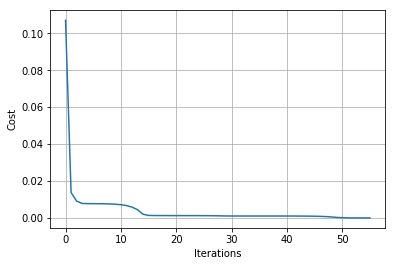

In [79]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [80]:
NN.costFunctionPrime(X,y)

(array([[  2.05487375e-06,  -3.12441450e-07,  -1.10228491e-07],
        [  7.91158365e-07,   2.49037381e-07,   4.61465184e-07]]),
 array([[ -9.14577919e-07],
        [ -1.67465069e-06],
        [ -1.64879759e-06]]))


O mais interessante aqui é que finalmente temos uma rede treinada que pode prever sua pontuação em um teste baseado em quantas horas você dorme e quantas horas você estuda na noite anterior. Se executarmos nossos dados de treinamento por meio de nosso método de encaminhamento agora, veremos que nossas previsões são excelentes. Podemos dar um passo além e explorar o espaço de entrada para várias combinações de horas de sono e horas de estudo, e talvez possamos encontrar uma combinação ideal das duas para o próximo teste.

In [81]:
NN.forward(X)

array([[ 0.75000623],
       [ 0.81998883],
       [ 0.92999089]])

In [82]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [83]:
# Teste a rede para várias combinações de dormir/estudar
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

# Normalizar os dados
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

# criar a versão 2-d do input para ser plotado
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Junta tudo em uma matriz
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [84]:
allOutputs = NN.forward(allInputs)

Text(0,0.5,'Hours Study')

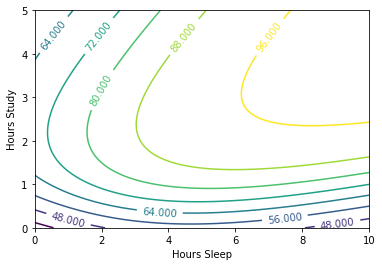

In [85]:
#Curvas de contorno
#
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

Text(0.5,0,'Test Score')

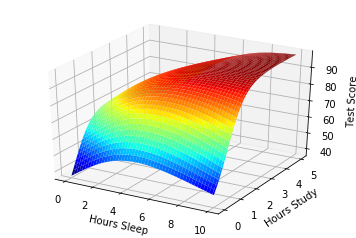

In [90]:
#3D plot:

##descomente esta linha pra imprimir fora do notebook e poder rotacioná-la
##%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')


Nossos resultados parecem bastante razoáveis, e vemos que, para o nosso modelo, o sono realmente tem um impacto maior em sua série do que em estudar - algo que eu gostaria de ter percebido quando estava na escola. Então acabamos, certo? Não.

Fizemos possivelmente o erro mais perigoso e tentador no aprendizado de máquina - overfitting. Embora nossa rede esteja apresentando um desempenho incrivelmente bom (talvez muito bem) em nossos dados de treinamento, isso não significa que nosso modelo é adequado para o mundo real, e é nisso que vamos trabalhar agora.

<h1 align = 'center'> Desmistificando Redes Neurais </h1>
<h2 align = 'center'> Parte 7: Overfitting, Testes e Regularização </h2>


<h4 align = 'center' > Traduzido de @stephencwelch </h4>

Até aqui treinamos nossa Rede Neural e ela fez previsões suspeitas de sua pontuação no teste com base em quantas horas você dormiu e quantas horas você estudou na noite anterior. Antes de celebrar e começar a mudar nossos hábitos de sono e estudo, precisamos de alguma maneira de garantir que nosso modelo reflita o mundo real.

Para fazer isso, vamos primeiro gastar algum tempo pensando em dados. Como muitos dados, nossos valores de entrada e saída vêm de observações do mundo real. A suposição aqui é que existe algum processo subjacente e nossas observações nos dão uma visão do processo - MAS nossas observações não são a mesma coisa que o processo, elas são apenas uma amostra.

Nossa observação diz que quando dormimos por 3 horas e estudamos por 5 horas, a nota que ganhamos foi 75. Mas isso significa que toda vez que você dorme por 3 horas e estuda por 5 horas, você ganha 75? Claro que não, porque há outras variáveis que importam aqui, como a dificuldade do teste ou se você está prestando atenção em palestras - nós poderíamos quantificar essas variáveis para construir um modelo melhor, mas mesmo se tivéssemos, não haveria ainda é um elemento de incerteza que nunca poderemos modelar explicitamente - por exemplo, talvez o teste tenha sido de múltipla escolha e você adivinhou alguns problemas.

Uma maneira de pensar sobre esse problema é que as observações são compostas de sinal e ruído. Nate Silver, o cara que previu corretamente os resultados das eleições dos EUA para 50 dos 50 estados dos EUA em 2012, escreveu um ótimo livro sobre exatamente isso. A ideia é que estamos interessados em um processo subjacente, o sinal, mas em dados reais, nosso sinal será sempre obscurecido por algum nível de ruído.

Um exemplo interessante disso aparece quando comparamos as pontuações do SAT de alunos que fazem o SAT tanto no ano júnior quanto no último ano. No site do conselho da faculdade, ele diz: "Quanto mais alto o resultado do aluno como júnior, maior a probabilidade de a pontuação subseqüente do aluno cair". Por que isso seria? Parece que os alunos que se saíram bem no primeiro ano também se sairiam bem no último ano. Podemos entender isso considerando que as pontuações do SAT são compostas de um sinal e um componente de ruído - sendo o sinal a aptidão subjacente do aluno, e o ruído sendo outros fatores que afetam os resultados dos testes, basicamente se o aluno teve um bom dia. ou não. Dos alunos que se saíram bem na primeira vez, esperamos que um número desproporcional tenha tido um bom dia - e como um dia bom é aleatório, quando esses alunos têm um dia de teste regular ou ruim no próximo teste, suas pontuações vão baixa.

Então, se conseguirmos convencer nosso modelo a ajustar o sinal e não o ruído, poderemos evitar o overfitting. Primeiro, vamos trabalhar no diagnóstico de overfitting, depois vamos trabalhar para corrigi-lo. A última vez mostramos as previsões do nosso modelo em todo o espaço de entrada para várias combinações de horas de sono e horas de estudo. Nós adicionaremos mais alguns pontos de dados para tornar o overfitting um pouco mais óbvio e treinar novamente nosso modelo no novo conjunto de dados. Se reexaminarmos nossas previsões em nosso espaço amostral, começamos a ver um comportamento estranho. As redes neurais são modelos de aprendizado realmente poderosos, e vemos aqui que todo esse poder foi usado para encaixar nossos dados muito de perto - o que cria um problema - nosso modelo não é mais um reflexo do mundo real. De acordo com o nosso modelo, em alguns casos, estudar mais irá realmente empurrar nossa pontuação para baixo, isso parece improvável - esperamos que estudar mais não diminua sua pontuação.




In [91]:
NN = Neural_Network()

In [92]:
# X = (horas dormindo, horas estudando), y = nota (0 a 100)
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

Text(0,0.5,'Test Score')

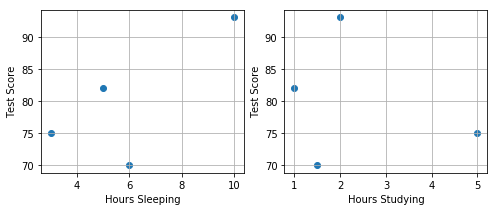

In [93]:
#Plot projecoes de nossos novos dados
fig = figure(0,(8,3))

subplot(1,2,1)
scatter(X[:,0], y)
grid(1)
xlabel('Hours Sleeping')
ylabel('Test Score')

subplot(1,2,2)
scatter(X[:,1], y)
grid(1)
xlabel('Hours Studying')
ylabel('Test Score')

In [94]:
#Normalizar
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [97]:
#Trainar a rede com novos dados 
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 151
         Function evaluations: 164
         Gradient evaluations: 164


Text(0,0.5,'Cost')

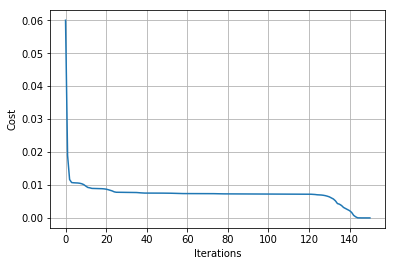

In [98]:
#Plot Custo durante o treinamento
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [100]:
#Testa a rede para várias combinações de horas dormindo/estudando
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normaliza dados( da mesma forma que os dados de entrada foram normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

# Cria versão 2-d das entradas para plotting 
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Junta tudo em uma matriz de entrada 
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [101]:
allOutputs = NN.forward(allInputs)

Text(0,0.5,'Hours Study')

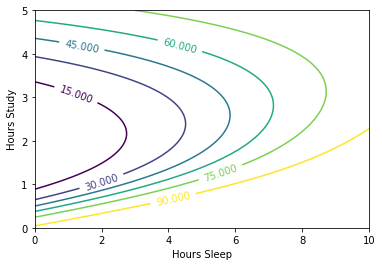

In [102]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

Text(0.5,0,'Test Score')

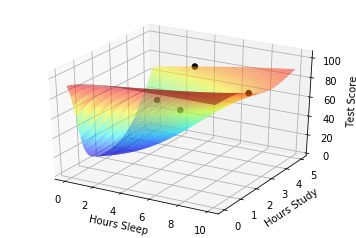

In [103]:
#3D plot:
#Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')


Então, parece que nosso modelo está super adaptando, mas como sabemos com certeza? Um método amplamente aceito é dividir nossos dados em duas partes: treinamento e teste. Não tocaremos em nossos dados de teste enquanto treinamos o modelo e só o usamos para ver como estamos indo. Nossos dados de teste são uma simulação do mundo real. Podemos traçar o erro em nossos conjuntos de treinamento e testes enquanto treinamos nosso modelo e identificamos o ponto exato em que o overfitting começa. Podemos também traçar erros de teste e treinamento como uma função da complexidade do modelo e ver um comportamento similar.

In [104]:
#Dados de treinamento
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#dados de teste:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normaliza:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize pelo max dos dados de treinamento:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [105]:
##Trainer foi modificado para mostrar os erros durante o treinamento
class trainer(object):
    def __init__(self, N):
        # Cria referencia para a rede
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        # cria variável para a função de callback
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [106]:
#treina a rede com novos dados
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.010035
         Iterations: 59
         Function evaluations: 60
         Gradient evaluations: 60


Text(0,0.5,'Cost')

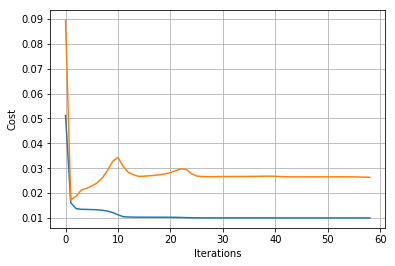

In [107]:
#Plot custos durante o treinamento
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

Então, agora que sabemos que o overfitting é um problema, mas como corrigir isso? Uma maneira é lançar mais dados no problema. Uma regra simples apresentada por Yaser Abu-Mostaf é o seu excelente curso de aprendizado de máquina disponível na Caltech, é que você deve ter pelo menos 10 vezes mais exemplos que os graus de liberdade em seu modelo. Para nós, como temos 9 pesos que podem mudar, precisamos de 90 observações, o que certamente não temos. Link para o curso: https://work.caltech.edu/telecourse.html

Outra maneira popular e eficaz de mitigar o overfitting é usar uma técnica chamada regularização. Uma maneira de implementar a regularização é adicionar um termo à nossa função de custo que penaliza modelos excessivamente complexos. Uma maneira simples, mas eficaz, de fazer isso é somar o quadrado de nossos pesos à nossa função de custo, dessa forma, modelos com maiores magnitudes de pesos, custam mais. Precisamos normalizar a outra parte de nossa função de custo para garantir que nossa proporção dos dois termos de erro não seja alterada em relação ao número de exemplos. Introduziremos um parâmetro hyper de regularização, lambda, que nos permitirá ajustar o custo relativo - valores mais altos de lambda imporão penalidades maiores para a alta complexidade do modelo.

In [108]:
#Parâmetro de regularização
Lambda = 0.0001 

In [109]:
# precisamos mudar a função de custo e sua derivada
def costFunction(self, X, y):
    # calcula o custo para um dado X,y usa pesos já armazenados na classe
    self.yHat = self.forward(X)
    # Não queremos que o custo aumente com o número de exemplos, então normalizamos
    # dividindo o termo de erro pelo numero de exemplos ((X.shape[0]))
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    # Calcula a deriva com relação a W e  W2 para um dado X e y
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    
    # adiciona gradiente do termo de regularização
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    # adiciona gradiente do termo de regularização
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [110]:
#nova classe com modificações
#
class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparametros
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Pesos (parâmetros)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Parâmetro de regularização
        self.Lambda = Lambda
        
    def forward(self, X):
        # propaga a entrada na rede
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #aplica a função sigmoide de ativação a escalar, vetor ou matriz
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        # gradiente da sigmoide
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        # calcula o custo para dados X,y, usa pesos já armazenados na classe
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        # calcula derivadas com relação a W e W2 para um dado X e y
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        # adiciona termo de regularização
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        # adiciona gradiente do termo de regularização
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    # função auxiliar para interagir com outras classes e métodos
    def getParams(self):
        # pega W1 e W2 e desenrola
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        # seta W1  e W2 usando vetor com parâmetro simples
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

Se treinamos nosso modelo agora, vemos que o ajuste ainda é bom, mas nosso modelo não está mais interessado em “ajustar” exatamente nossos dados. Além disso, nossos erros de treinamento e teste estão muito mais próximos, e reduzimos com sucesso o overfitting neste conjunto de dados. Para reduzir ainda mais o overfitting, poderíamos aumentar o lambda.

In [111]:
NN = Neural_Network(Lambda=0.0001)

In [112]:
# verificando se nosso gradiente ainda está correto depois de fazer  mudanças
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [113]:
# Deve ser menor que 1e-8:
norm(grad-numgrad)/norm(grad+numgrad)

1.2137852988374216e-10

In [114]:
T = trainer(NN)

In [115]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.002618
         Iterations: 78
         Function evaluations: 82
         Gradient evaluations: 82


Text(0,0.5,'Cost')

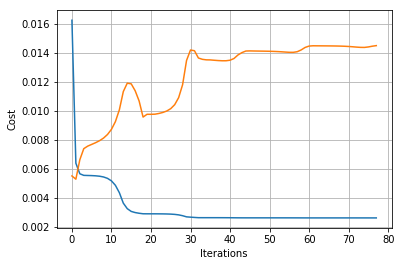

In [116]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

Text(0,0.5,'Horas Estudando')

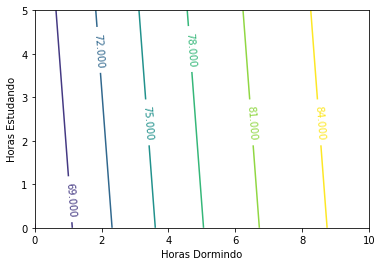

In [117]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Horas Dormindo')
ylabel('Horas Estudando')

Text(0.5,0,'Nota no Teste')

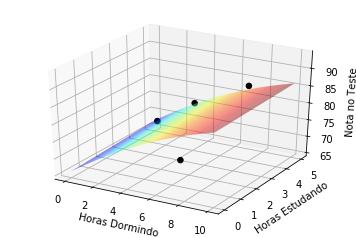

In [119]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)

ax.set_xlabel('Horas Dormindo')
ax.set_ylabel('Horas Estudando')
ax.set_zlabel('Nota no Teste')

E é isso, treinamos e avaliamos uma Rede Neural Artificial para prever sua pontuação em um teste com base em quantas horas você dormiu e estudou na noite anterior.

<h1 align = 'center'> The End </h1>


Gostei muito de fazer esses vídeos e queria agradecer a todos que assistiram e comentaram. Gostaria de salientar que o suporte a notebooks iPython está vinculado abaixo e disponível em welchlabs.com/blog. Para se manter atualizado sobre os vídeos futuros, siga @stephencwelch no twitter, obrigado!